In [1]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def list_img(path,filetypes):
    
    files = []    
    for filename in Path(str(path)).rglob('*.{}'.format(filetypes)):
        files.append(filename)
    return files

In [3]:
def binary_image(path, threshold=100):
    
    im = np.array(cv2.imread(str(path), 0))
    im = 1.0 * (im < threshold)
    
    return im    

In [4]:
def f1_score(gt,sg):
    '''
    Returns evaluasi segmentasi citra menggunakan perhitungan f1 score/dice coeff
    Parameters
    ------------
    gt : 2d numpy arry
         citra ground truth
    sg : 2d numpy array
         citra hasil segmentasi
         
    Notes
    ------------
    2d numpy array harus [0, 1]
    0/hitam adalah background
    1/putih adalah foreground

    '''
    if (gt.shape!=sg.shape):
        return 'Size not match!'
    
    fn = (gt.ravel()>sg.ravel()).sum()
    fp = (gt.ravel()<sg.ravel()).sum()
    tn = ((gt.ravel()==0)&(sg.ravel()==0)).sum()
    tp = ((gt.ravel()==1)&(sg.ravel()==1)).sum()
              
    f1 = (2*tp)/((2*tp)+fp+fn)
              
    return np.round(f1, 4)

In [5]:
files_gt = list_img('ground_truth/', 'jpg')
files_sg = list_img('segmentation/', 'png')

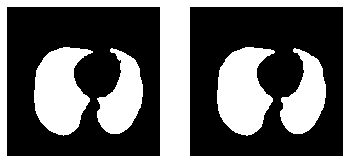

In [6]:
idx = 5

im_gt = binary_image(files_gt[idx])
im_sg = binary_image(files_sg[idx])

fig, ax = plt.subplots(1,2)
ax[0].imshow(im_gt, cmap='binary')
ax[0].axis('off')
ax[1].imshow(im_sg, cmap='binary')
ax[1].axis('off')

plt.show()

In [7]:
f1_score(im_gt,im_sg)

0.999

In [8]:
result = np.array([])
for i in range (len(files_gt)):
    g = binary_image(files_gt[i])
    s = binary_image(files_sg[i])
    result = np.append(result, f1_score(g, s))

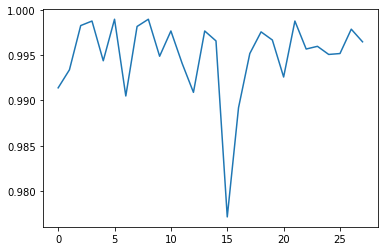

In [9]:
plt.plot(result)